In [1]:
%matplotlib inline


# Create and Plot Signals


Use PySoundTool to create and plot signals / noise and add them together at a specific SNR.

To see how PySoundTool implements this, see `pysoundtool.dsp.generate_sound`, 
`pysoundtool.dsp.generate_noise` and `pysoundtool.dsp.add_backgroundsound`.



In [2]:
# to be able to import pysoundtool from parent directory:
import os
package_dir = '../'
os.chdir(package_dir)

Let's import pysoundtool, assuming it is in your working directory:



In [3]:
import pysoundtool as pyso;

Using TensorFlow backend.


# Create a Signal


First let's set what sample rate we want to use



In [4]:
sr = 8000

## Let's create a signal of 10 Hz 



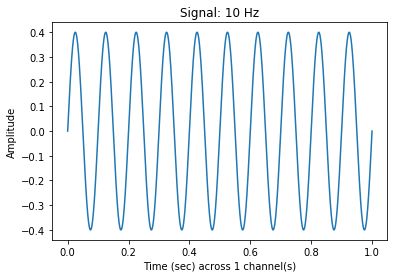

In [6]:
sig1_hz = 10
sig1, sr = pyso.generate_sound(freq=sig1_hz, amplitude = 0.4, sr=sr, dur_sec=1)
pyso.plotsound(sig1, sr=sr, feature_type = 'signal',
               title = 'Signal: {} Hz'.format(sig1_hz))

## Let's create a signal of 20 Hz



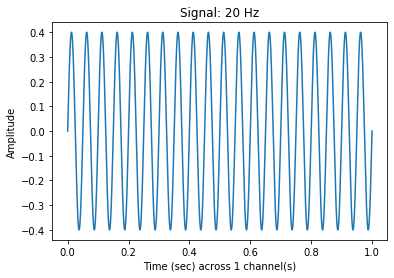

In [7]:
sig2_hz = 20 
sig2, sr = pyso.generate_sound(freq=sig2_hz, amplitude= 0.4, sr=sr, dur_sec=1)
pyso.plotsound(sig2, sr=sr, feature_type = 'signal',
               title = 'Signal: {} Hz'.format(sig2_hz))

# Combine Signals 



Add them together and see what they look like:



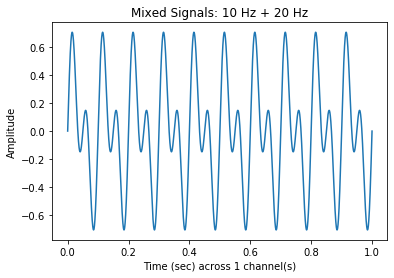

In [8]:
sig3 = sig1 + sig2
pyso.plotsound(sig3, sr=sr, feature_type = 'signal', 
               title='Mixed Signals: {} Hz + {} Hz'.format(sig1_hz, sig2_hz))

# Generate Pseudo-Random Noise



## Create noise to add to the signal:



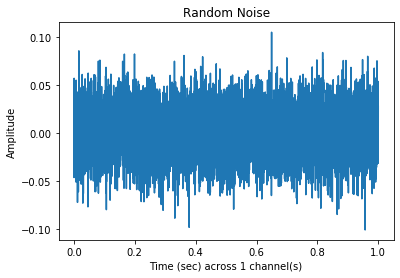

In [9]:
noise = pyso.generate_noise(len(sig3), amplitude=0.025, random_seed=40)
pyso.plotsound(noise, sr=sr, feature_type = 'signal', title='Random Noise')

# Control SNR: Adding a Background Sound



## Add noise at signal-to-noise ratio of 40



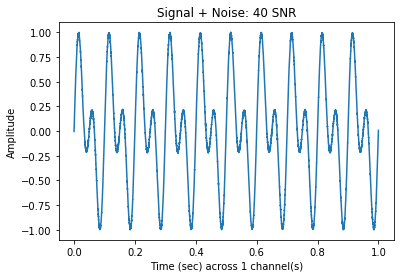

In [10]:
sig_noisy, snr = pyso.dsp.add_backgroundsound(audio_main = sig3, 
                                         audio_background = noise, 
                                         sr = sr,
                                         snr = 40)

# keep energy between 1 and -1 
sig_noisy = pyso.dsp.scalesound(sig_noisy, max_val=1)
pyso.plotsound(sig_noisy, sr=sr, feature_type = 'signal', title='Signal + Noise: 40 SNR')

## Add noise at signal-to-noise ratio of 20



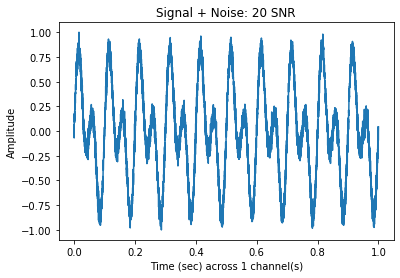

In [11]:
sig_noisy, snr = pyso.dsp.add_backgroundsound(audio_main = sig3, 
                                         audio_background = noise,
                                         sr = sr,
                                         snr = 20)
# keep energy between 1 and -1 
sig_noisy = pyso.dsp.scalesound(sig_noisy, max_val=1)
pyso.plotsound(sig_noisy, sr=sr, feature_type = 'signal', title='Signal + Noise: 20 SNR')

## Add noise at signal-to-noise ratio of 10



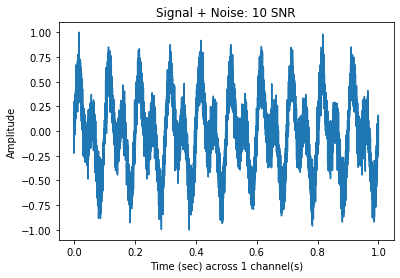

In [12]:
sig_noisy, snr = pyso.dsp.add_backgroundsound(audio_main = sig3, 
                                         audio_background = noise,
                                         sr = sr,
                                         snr = 10)
# keep energy between 1 and -1 
sig_noisy = pyso.dsp.scalesound(sig_noisy, max_val=1)
pyso.plotsound(sig_noisy, sr=sr, feature_type = 'signal', title='Signal + Noise: 10 SNR')

## Add noise at signal-to-noise ratio of 0



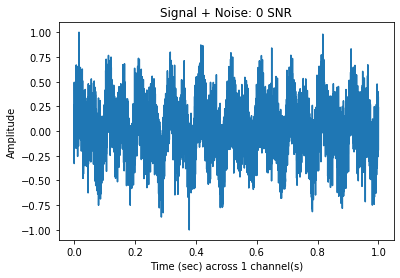

In [13]:
sig_noisy, snr = pyso.dsp.add_backgroundsound(audio_main = sig3,
                                         audio_background = noise,
                                         sr = sr,
                                         snr = 0)
# keep energy between 1 and -1 
sig_noisy = pyso.dsp.scalesound(sig_noisy, max_val=1)
pyso.plotsound(sig_noisy, sr=sr, feature_type = 'signal', title='Signal + Noise: 0 SNR')

## Add noise at signal-to-noise ratio of -10



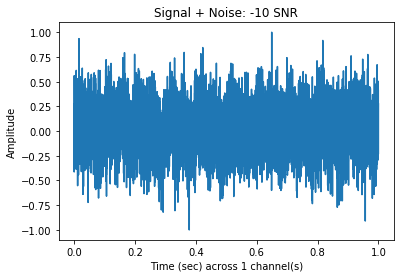

In [14]:
sig_noisy, snr = pyso.dsp.add_backgroundsound(audio_main = sig3, 
                                         audio_background = noise,
                                         sr = sr,
                                         snr = -10)
# keep energy between 1 and -1 
sig_noisy = pyso.dsp.scalesound(sig_noisy, max_val=1)
pyso.plotsound(sig_noisy, sr=sr, feature_type = 'signal', title='Signal + Noise: -10 SNR')